In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/titanic.csv')
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


### No null value

In [4]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [5]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### Question 1 - What is the overall survival rate of the passengers?

In [15]:
survival_rate= df['Survived'].mean()*100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

Overall Survival Rate: 38.56%


### Question 2 - How does survival rate vary by passenger class (Pclass)?

In [22]:
df.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.435318
Name: Survived, dtype: float64

### Question 3 - What is the distribution of ages among the passengers?

In [26]:
import matplotlib.pyplot as plt

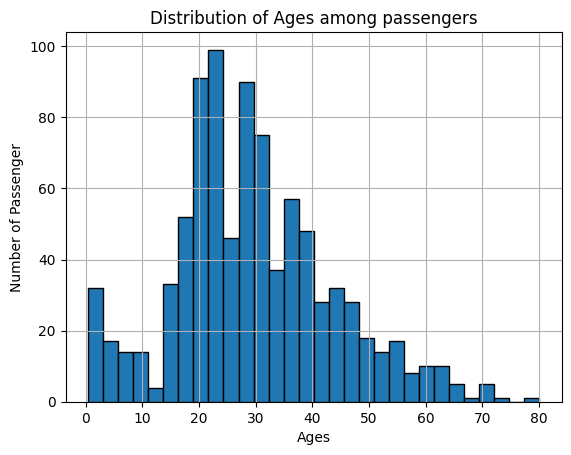

In [35]:
plt.hist(df['Age'],bins=30,edgecolor='black')
plt.title('Distribution of Ages among passengers')
plt.xlabel('Ages')
plt.ylabel('Number of Passenger')
plt.grid(True)
plt.show()

### Question 4 - How does the survival rate vary between male and female passengers?

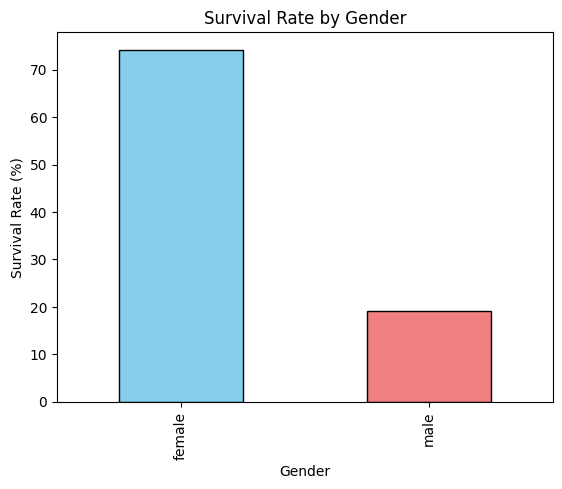

In [50]:
Survival_Rate=df.groupby('Sex')['Survived'].mean()*100
Survival_Rate.plot(kind='bar',color=['skyblue', 'lightcoral'],edgecolor='black')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.show()

### Question 6 -What is the correlation between age and survival rate?

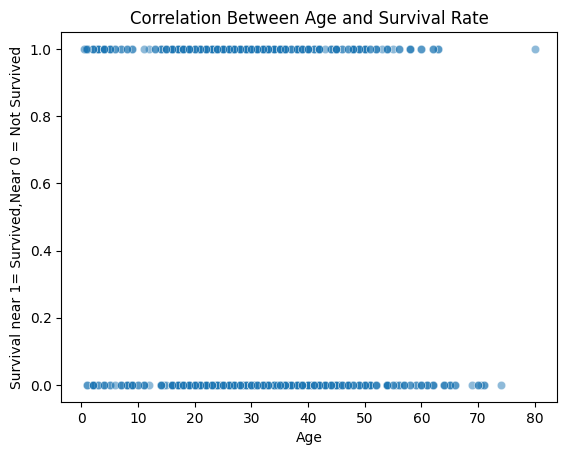

In [63]:
import seaborn as sns
Correlation_age_survival = df['Age'].corr(df['Survived'])
sns.scatterplot(x='Age', y='Survived', data=df, alpha=0.5)
plt.title('Correlation Between Age and Survival Rate')
plt.xlabel('Age')
plt.ylabel('Survival near 1= Survived,Near 0 = Not Survived')
plt.show()

By this we can say that age and surival rate is not correlated.

### Question 7 - What is the survival rate for families (siblings/spouses and parents/children)?

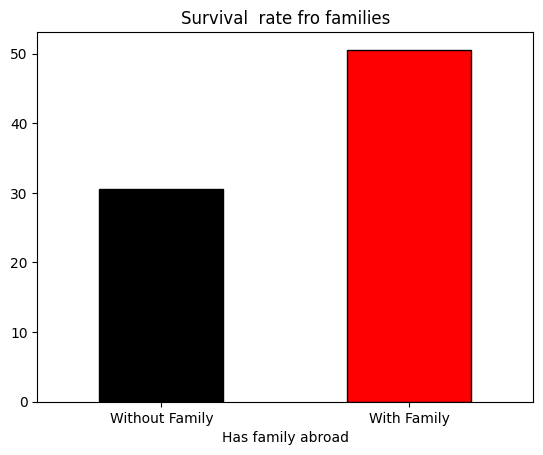

In [85]:
df['have_family']=(df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'])>0
survival_Rate_have_family = df.groupby('have_family')['Survived'].mean()*100
survival_Rate_have_family.plot(kind='bar',color=['black','red'],edgecolor='black')
plt.title('Survival  rate fro families')
plt.xlabel('Has family abroad')
plt.xticks([0, 1], ['Without Family', 'With Family'], rotation=0)
plt.show()

### Question 8 - What is the average fare paid by passengers, and how does it vary by class and survival status?

Average fare: 32.30542018038331


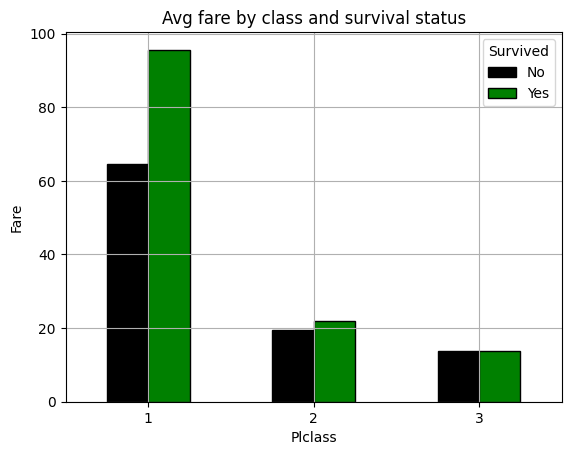

In [100]:
print('Average fare:',df['Fare'].mean())
average_fare = df.groupby(['Pclass', 'Survived'])['Fare'].mean().unstack()
average_fare.plot(kind='bar',color=['black','green'],edgecolor='black')
plt.title('Avg fare by class and survival status')
plt.xlabel('Plclass')
plt.ylabel('Fare')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

## Data Visualization Questions

### Question 1 - Create a bar plot showing the number of passengers in each class (Pclass).

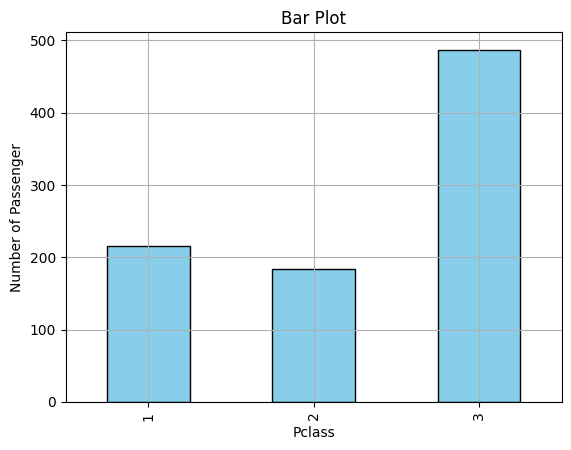

In [123]:
number_of_passenger = df['Pclass'].value_counts().sort_index()
number_of_passenger.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Bar Plot')
plt.xlabel('Pclass')
plt.ylabel('Number of Passenger')
plt.grid(True)
plt.show()

### Question 2 - Create a pie chart showing the proportion of passengers who survived vs. those who did not.

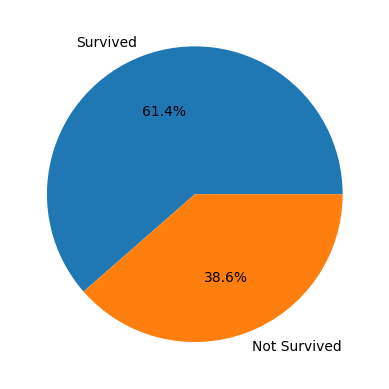

In [128]:
labels = 'Survived','Not Survived'
Passenger_survived = df['Survived'].value_counts()
fig, ax = plt.subplots()
ax.pie(Passenger_survived, labels=labels, autopct='%1.1f%%')
plt.show()

### Question 3 - Create a histogram showing the age distribution of the passengers.

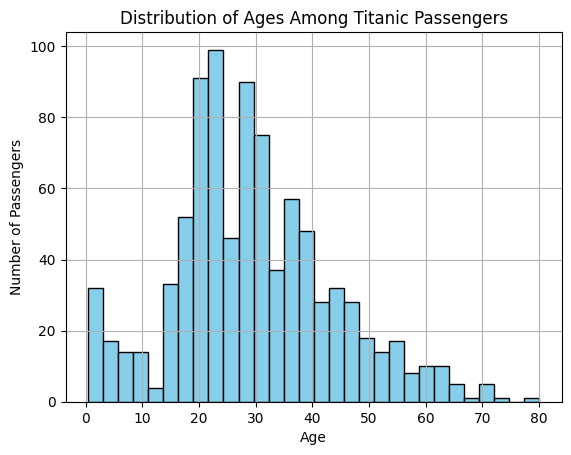

In [135]:
plt.hist(df['Age'],bins=30,edgecolor='black',color='skyblue')
plt.title('Distribution of Ages Among Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid()
plt.show()

### Question 4 - Create a bar plot comparing the survival rates of male and female passengers.

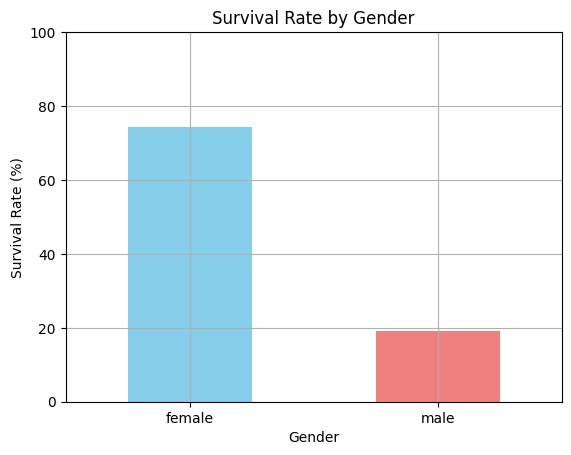

In [140]:
Survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()*100
Survival_rate_by_gender.plot(kind='bar',color=['skyblue', 'lightcoral'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

### Question 5 - Create a scatter plot showing the relationship between age and fare paid.

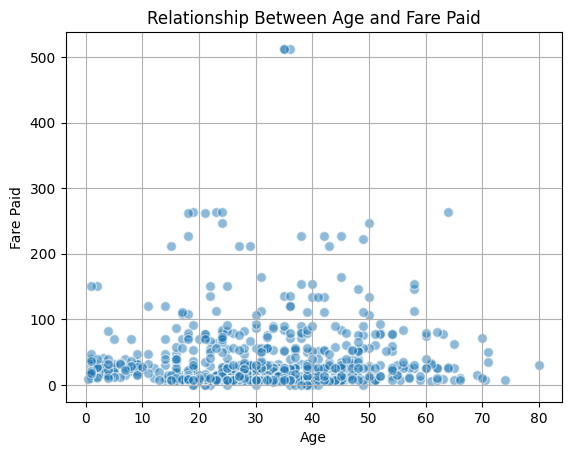

In [147]:
plt.scatter(df['Age'],df['Fare'], alpha=0.5, edgecolors='w', s=50)
plt.title('Relationship Between Age and Fare Paid')
plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.grid(True)
plt.show()

### Question 6 - Create a box plot showing the distribution of fares across different passenger classes.

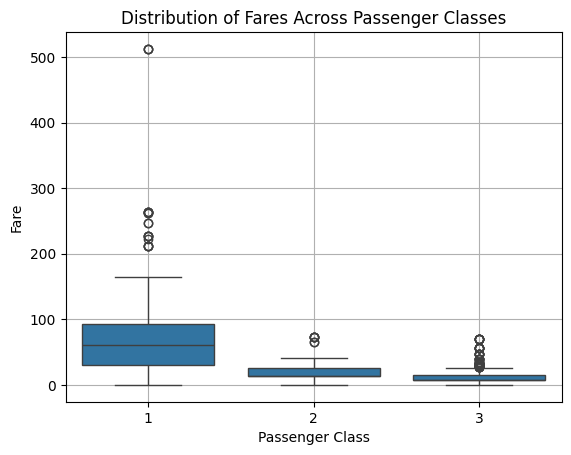

In [151]:
sns.boxplot(x='Pclass',y='Fare',data=df)
plt.title('Distribution of Fares Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

### Question 7 - Create a heatmap to show the correlation between different numerical features in the dataset.

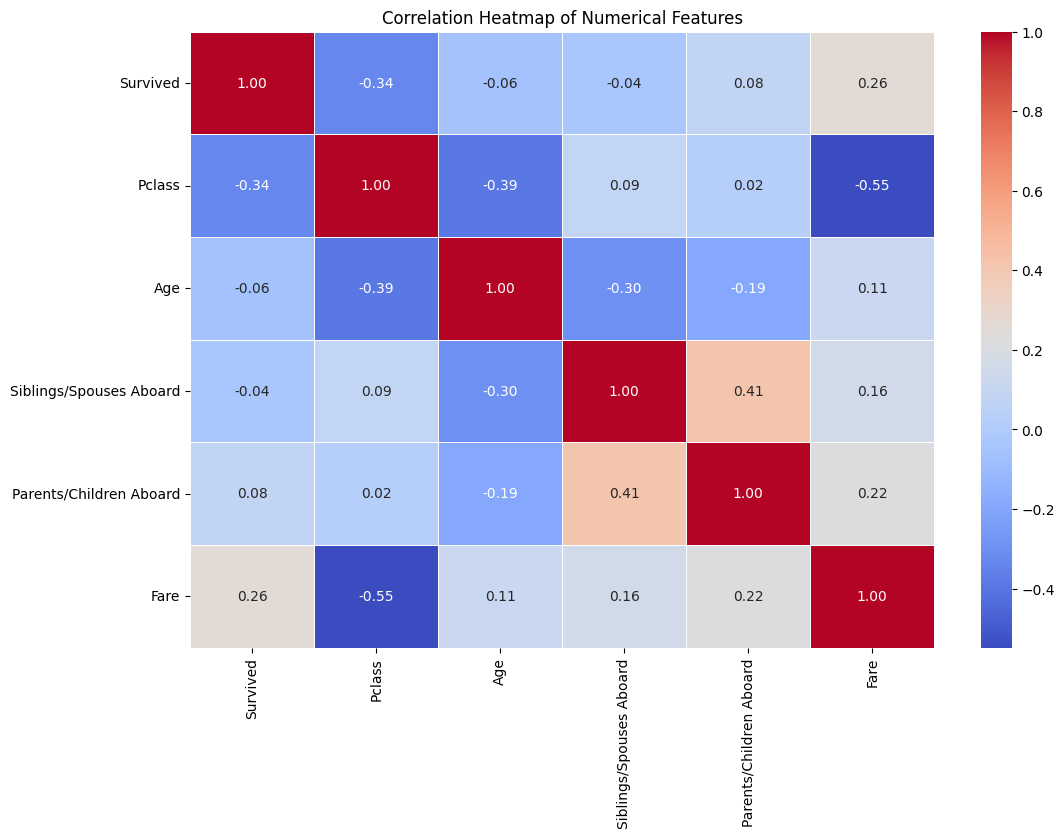

In [152]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()